In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
CBMetrics = pd.read_csv(r'C:\Jasbir\Data Science Project Capgemini\File Risk Prediction\CBMetrics.csv')
Labelled = pd.read_csv(r'C:\Jasbir\Data Science Project Capgemini\File Risk Prediction\Labelled_File.csv')

In [3]:
CBMetrics.head() # Check the structure of CBMetrics file

,ModifiedFile,File_Extn,File_Format,Total_Revisions,NumberofNonNativeDev,TimeFirstBurst,TimeLastBurst,MaximumChangeBurst,MaximumChangeBurstEarly,MaximumChangeBurstLate,...,NumberConsecutiveChanges,PeopleTotal,TimeMaxBurst,TotalBurstsize,TotalBurstSizeEarly,TotalBurstSizeLate,TotalPeopleInBurst,ChurnTotalLog,MaxChurnInBurstLog,TotalChurnInBurstLog
0,App\AudioApp\.cproject,cproject,text,2,NaN,0.230924,0.363454,1.0,1.0,NaN,...,2.0,1,0.230924,2.0,2.0,NaN,1.0,6.194405,5.537334,6.194405
1,App\AudioApp\app_mgr\AudioApp_AppManager.cpp,cpp,text,9,NaN,0.363454,0.895582,3.0,1.0,3.0,...,6.0,1,0.865462,8.0,3.0,5.0,1.0,6.963190,6.517671,6.963190
2,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,cpp,text,5,NaN,0.230924,0.865462,2.0,1.0,2.0,...,4.0,1,0.865462,5.0,2.0,3.0,1.0,5.398163,4.330733,5.398163
3,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,h,text,4,NaN,0.230924,0.865462,1.0,1.0,1.0,...,4.0,1,0.230924,4.0,2.0,2.0,1.0,4.976734,4.025352,4.976734
4,App\AudioApp\app_mgr\listener\RemoteAudioAppMa...,cpp,text,5,NaN,0.230924,0.865462,1.0,1.0,1.0,...,5.0,1,0.230924,5.0,4.0,1.0,1.0,5.752573,4.882802,5.752573


In [4]:
Labelled.sample(n=5) #check structure of Labelled file random sample

,ModifiedFile,File_Extn,File_Format,Revision_Storage,Total_Revisions,Branches,Branch_Revisions,AuthorEmail,DateTime,Lines_added,Lines_Removed,CommitID,Comment,No.ChangesINfile,ID,Date,Owner,Task_Category,BugFix,Defective
3518,Platform\TYAA_QNX_M3N_BSP\src\hardware\startup...,h,text,reverse deltas,5,0,0,Pavan Pamidi (dsppamidi),2019-05-24 10:51:00,1,-1,1.2,1499597:1 Integrate latest QNX BSP,2,1499597.0,2019-05-24,Pavan Pamidi (dsppamidi),Task,YES,YES
3557,Platform\TYAA_QNX_M3N_BSP\src\hardware\startup...,h,text,reverse deltas,7,0,0,Pavan Pamidi (dsppamidi),2019-05-24 10:52:00,1,-1,1.4,1499597:1 Integrate latest QNX BSP,2,1499597.0,2019-05-24,Pavan Pamidi (dsppamidi),Task,YES,YES
1327,Hmi\engine\apps\utilities\RMUeglassert.h,h,text,reverse deltas,1,0,0,Ural Kota (dsukota),2018-08-17 18:57:00,54,0,1.1,1331419:1 [Meter] To Checkin the HMI into the ...,54,1331419.0,2018-08-17,James Mcnally (dsjmcnally),Implementation,NO,NO
3445,Platform\TYAA_QNX_M3N_BSP\src\hardware\startup...,c,text,reverse deltas,6,0,0,Pavan Pamidi (dsppamidi),2019-05-24 10:56:00,1,-1,1.3,1499597:1 Integrate latest QNX BSP,2,1499597.0,2019-05-24,Pavan Pamidi (dsppamidi),Task,NO,NO
1163,Hmi\engine\apps\apps\JA_TYAA_RS\ZIPCGeneration...,h,text,reverse deltas,1,0,0,Ural Kota (dsukota),2019-05-24 16:21:00,83,0,1.1,1470312:6 [Meter][HMI][DAN0][Target] Integrate...,83,1470312.0,2019-05-24,Ural Kota (dsukota),Implementation,NO,NO


In [5]:
CBMetrics.info()  # Check the data type, null value of CBMetrices file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
ModifiedFile                    3818 non-null object
File_Extn                       3818 non-null object
File_Format                     3818 non-null object
Total_Revisions                 3818 non-null int64
NumberofNonNativeDev            3334 non-null float64
TimeFirstBurst                  3817 non-null float64
TimeLastBurst                   3817 non-null float64
MaximumChangeBurst              3817 non-null float64
MaximumChangeBurstEarly         2637 non-null float64
MaximumChangeBurstLate          2000 non-null float64
MaxPeopleinBurst                3817 non-null float64
NumberConsecutiveChangesLate    2000 non-null float64
NumberOfChanges                 3818 non-null int64
NumberOfChangesEarly            2637 non-null float64
NumberOfChangesLate             2095 non-null float64
NumberChangeBursts              3817 non-null float64
NumberChangeBurstsEarly         2637

In [6]:
Labelled.info()  # Checked the data type and null value of Labelled file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 20 columns):
ModifiedFile        3818 non-null object
File_Extn           3818 non-null object
File_Format         3818 non-null object
Revision_Storage    3818 non-null object
Total_Revisions     3818 non-null int64
Branches            3818 non-null int64
Branch_Revisions    3818 non-null int64
AuthorEmail         3818 non-null object
DateTime            3818 non-null object
Lines_added         3818 non-null int64
Lines_Removed       3818 non-null int64
CommitID            3818 non-null object
Comment             3551 non-null object
No.ChangesINfile    3818 non-null int64
ID                  3551 non-null float64
Date                3818 non-null object
Owner               3545 non-null object
Task_Category       2971 non-null object
BugFix              3818 non-null object
Defective           3818 non-null object
dtypes: float64(1), int64(6), object(13)
memory usage: 596.6+ KB


In [7]:
CBMetrics.describe() # Check the central tendency of CBMetrics

,Total_Revisions,NumberofNonNativeDev,TimeFirstBurst,TimeLastBurst,MaximumChangeBurst,MaximumChangeBurstEarly,MaximumChangeBurstLate,MaxPeopleinBurst,NumberConsecutiveChangesLate,NumberOfChanges,...,NumberConsecutiveChanges,PeopleTotal,TimeMaxBurst,TotalBurstsize,TotalBurstSizeEarly,TotalBurstSizeLate,TotalPeopleInBurst,ChurnTotalLog,MaxChurnInBurstLog,TotalChurnInBurstLog
count,3818.000000,3334.000000,3817.000000,3817.000000,3817.000000,2637.000000,2000.000000,3817.000000,2000.000000,3818.000000,...,3817.000000,3818.000000,3817.000000,3817.000000,2637.000000,2000.000000,3817.000000,3818.000000,3817.000000,3817.000000
mean,2.352017,1.387223,0.449200,0.634640,1.042442,1.031096,1.049500,1.006026,1.188000,1.935045,...,1.638198,1.445521,0.462660,1.692429,1.508912,1.240500,1.230548,5.546185,5.482565,5.547638
std,2.321257,0.709351,0.414824,0.396420,0.243965,0.200010,0.268488,0.080716,0.532727,1.716926,...,1.433296,0.769331,0.415861,1.634510,1.282697,0.704917,0.494498,1.891430,1.891188,1.889546
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.693147,0.693147
25%,1.000000,1.000000,0.034137,0.076305,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.034137,1.000000,1.000000,1.000000,1.000000,4.127134,4.060443,4.127134
50%,1.000000,1.000000,0.393574,0.865462,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.407631,1.000000,1.000000,1.000000,1.000000,5.192957,5.093750,5.192957
75%,3.000000,2.000000,0.969880,0.969880,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,0.969880,2.000000,1.000000,1.000000,1.000000,6.650279,6.587550,6.650279
max,19.000000,5.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,6.000000,16.000000,...,14.000000,5.000000,1.000000,16.000000,11.000000,8.000000,4.000000,15.227094,15.227094,15.227094


In [8]:
Labelled.describe() #Check the central tendency of Labelled file

,Total_Revisions,Branches,Branch_Revisions,Lines_added,Lines_Removed,No.ChangesINfile,ID
count,3818.000000,3818.000000,3818.000000,3.818000e+03,3818.000000,3.818000e+03,3.551000e+03
mean,2.352017,0.015191,0.030644,1.561038e+04,-8.348612,1.561873e+04,1.359566e+06
std,2.321257,0.122329,0.247288,1.719794e+05,136.754521,1.719788e+05,1.806048e+05
min,1.000000,0.000000,0.000000,0.000000e+00,-7130.000000,0.000000e+00,9.728820e+05
25%,1.000000,0.000000,0.000000,2.000000e+00,-1.000000,4.000000e+00,1.331419e+06
50%,1.000000,0.000000,0.000000,4.900000e+01,0.000000,5.000000e+01,1.468795e+06
75%,3.000000,0.000000,0.000000,2.660000e+02,0.000000,2.770000e+02,1.470312e+06
max,19.000000,1.000000,3.000000,4.102446e+06,0.000000,4.102446e+06,1.501002e+06


In [9]:
CBMetrics.isnull().sum()  #Total null values in each feature of CBMetrics file

ModifiedFile                       0
File_Extn                          0
File_Format                        0
Total_Revisions                    0
NumberofNonNativeDev             484
TimeFirstBurst                     1
TimeLastBurst                      1
MaximumChangeBurst                 1
MaximumChangeBurstEarly         1181
MaximumChangeBurstLate          1818
MaxPeopleinBurst                   1
NumberConsecutiveChangesLate    1818
NumberOfChanges                    0
NumberOfChangesEarly            1181
NumberOfChangesLate             1723
NumberChangeBursts                 1
NumberChangeBurstsEarly         1181
NumberChangeBurstsLate          1818
NumberConsecutiveChanges           1
PeopleTotal                        0
TimeMaxBurst                       1
TotalBurstsize                     1
TotalBurstSizeEarly             1181
TotalBurstSizeLate              1818
TotalPeopleInBurst                 1
ChurnTotalLog                      0
MaxChurnInBurstLog                 1
T

In [10]:
Labelled.isnull().sum()  # Total null value of each feature of Labelled file

ModifiedFile          0
File_Extn             0
File_Format           0
Revision_Storage      0
Total_Revisions       0
Branches              0
Branch_Revisions      0
AuthorEmail           0
DateTime              0
Lines_added           0
Lines_Removed         0
CommitID              0
Comment             267
No.ChangesINfile      0
ID                  267
Date                  0
Owner               273
Task_Category       847
BugFix                0
Defective             0
dtype: int64

In [11]:
Labelled['DateTime'].isnull().sum()

0

In [12]:
x =Labelled['DateTime']

In [13]:
data = pd.DataFrame(x)

In [14]:
data.head()

,DateTime
0,2018-07-26 13:12:00
1,2019-04-17 15:14:00
2,2019-04-05 14:23:00
3,2019-04-02 11:19:00
4,2019-04-02 11:19:00


In [15]:
New_Labelled = Labelled[['DateTime','Defective']] # Created new dataframe which take value DateTime and Defective from Labelled

In [16]:
File_Risk = pd.concat([CBMetrics,New_Labelled],join='inner',axis= 1) #Concatenate the New_Labelled with CBMetrics

In [17]:
File_Risk.head() # New structure of FILe_Risk dataframe

,ModifiedFile,File_Extn,File_Format,Total_Revisions,NumberofNonNativeDev,TimeFirstBurst,TimeLastBurst,MaximumChangeBurst,MaximumChangeBurstEarly,MaximumChangeBurstLate,...,TimeMaxBurst,TotalBurstsize,TotalBurstSizeEarly,TotalBurstSizeLate,TotalPeopleInBurst,ChurnTotalLog,MaxChurnInBurstLog,TotalChurnInBurstLog,DateTime,Defective
0,App\AudioApp\.cproject,cproject,text,2,NaN,0.230924,0.363454,1.0,1.0,NaN,...,0.230924,2.0,2.0,NaN,1.0,6.194405,5.537334,6.194405,2018-07-26 13:12:00,NO
1,App\AudioApp\app_mgr\AudioApp_AppManager.cpp,cpp,text,9,NaN,0.363454,0.895582,3.0,1.0,3.0,...,0.865462,8.0,3.0,5.0,1.0,6.963190,6.517671,6.963190,2019-04-17 15:14:00,NO
2,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,cpp,text,5,NaN,0.230924,0.865462,2.0,1.0,2.0,...,0.865462,5.0,2.0,3.0,1.0,5.398163,4.330733,5.398163,2019-04-05 14:23:00,NO
3,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,h,text,4,NaN,0.230924,0.865462,1.0,1.0,1.0,...,0.230924,4.0,2.0,2.0,1.0,4.976734,4.025352,4.976734,2019-04-02 11:19:00,YES
4,App\AudioApp\app_mgr\listener\RemoteAudioAppMa...,cpp,text,5,NaN,0.230924,0.865462,1.0,1.0,1.0,...,0.230924,5.0,4.0,1.0,1.0,5.752573,4.882802,5.752573,2019-04-02 11:19:00,YES


In [18]:
File_Risk['DateTime'] = pd.to_datetime(File_Risk['DateTime']) #Change the DateTime object to DateTime format

In [19]:
File_Risk.info() # Checking the changed data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
ModifiedFile                    3818 non-null object
File_Extn                       3818 non-null object
File_Format                     3818 non-null object
Total_Revisions                 3818 non-null int64
NumberofNonNativeDev            3334 non-null float64
TimeFirstBurst                  3817 non-null float64
TimeLastBurst                   3817 non-null float64
MaximumChangeBurst              3817 non-null float64
MaximumChangeBurstEarly         2637 non-null float64
MaximumChangeBurstLate          2000 non-null float64
MaxPeopleinBurst                3817 non-null float64
NumberConsecutiveChangesLate    2000 non-null float64
NumberOfChanges                 3818 non-null int64
NumberOfChangesEarly            2637 non-null float64
NumberOfChangesLate             2095 non-null float64
NumberChangeBursts              3817 non-null float64
NumberChangeBurstsEarly         2637

In [20]:
#File_Risk.set_index(File_Risk['DateTime'], inplace=True)

In [21]:
File_Risk.head()

,ModifiedFile,File_Extn,File_Format,Total_Revisions,NumberofNonNativeDev,TimeFirstBurst,TimeLastBurst,MaximumChangeBurst,MaximumChangeBurstEarly,MaximumChangeBurstLate,...,TimeMaxBurst,TotalBurstsize,TotalBurstSizeEarly,TotalBurstSizeLate,TotalPeopleInBurst,ChurnTotalLog,MaxChurnInBurstLog,TotalChurnInBurstLog,DateTime,Defective
0,App\AudioApp\.cproject,cproject,text,2,NaN,0.230924,0.363454,1.0,1.0,NaN,...,0.230924,2.0,2.0,NaN,1.0,6.194405,5.537334,6.194405,2018-07-26 13:12:00,NO
1,App\AudioApp\app_mgr\AudioApp_AppManager.cpp,cpp,text,9,NaN,0.363454,0.895582,3.0,1.0,3.0,...,0.865462,8.0,3.0,5.0,1.0,6.963190,6.517671,6.963190,2019-04-17 15:14:00,NO
2,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,cpp,text,5,NaN,0.230924,0.865462,2.0,1.0,2.0,...,0.865462,5.0,2.0,3.0,1.0,5.398163,4.330733,5.398163,2019-04-05 14:23:00,NO
3,App\AudioApp\app_mgr\handler\RemoteAudioAppMan...,h,text,4,NaN,0.230924,0.865462,1.0,1.0,1.0,...,0.230924,4.0,2.0,2.0,1.0,4.976734,4.025352,4.976734,2019-04-02 11:19:00,YES
4,App\AudioApp\app_mgr\listener\RemoteAudioAppMa...,cpp,text,5,NaN,0.230924,0.865462,1.0,1.0,1.0,...,0.230924,5.0,4.0,1.0,1.0,5.752573,4.882802,5.752573,2019-04-02 11:19:00,YES


In [22]:
File_Risk.isnull().sum() #Total number of null values in File_Risk

ModifiedFile                       0
File_Extn                          0
File_Format                        0
Total_Revisions                    0
NumberofNonNativeDev             484
TimeFirstBurst                     1
TimeLastBurst                      1
MaximumChangeBurst                 1
MaximumChangeBurstEarly         1181
MaximumChangeBurstLate          1818
MaxPeopleinBurst                   1
NumberConsecutiveChangesLate    1818
NumberOfChanges                    0
NumberOfChangesEarly            1181
NumberOfChangesLate             1723
NumberChangeBursts                 1
NumberChangeBurstsEarly         1181
NumberChangeBurstsLate          1818
NumberConsecutiveChanges           1
PeopleTotal                        0
TimeMaxBurst                       1
TotalBurstsize                     1
TotalBurstSizeEarly             1181
TotalBurstSizeLate              1818
TotalPeopleInBurst                 1
ChurnTotalLog                      0
MaxChurnInBurstLog                 1
T

In [23]:
File_Risk.drop(['ModifiedFile','File_Extn','File_Format','Total_Revisions'], axis= 1 ,inplace = True)
#Droping first three file as per the requriement 

In [24]:
File_Risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 26 columns):
NumberofNonNativeDev            3334 non-null float64
TimeFirstBurst                  3817 non-null float64
TimeLastBurst                   3817 non-null float64
MaximumChangeBurst              3817 non-null float64
MaximumChangeBurstEarly         2637 non-null float64
MaximumChangeBurstLate          2000 non-null float64
MaxPeopleinBurst                3817 non-null float64
NumberConsecutiveChangesLate    2000 non-null float64
NumberOfChanges                 3818 non-null int64
NumberOfChangesEarly            2637 non-null float64
NumberOfChangesLate             2095 non-null float64
NumberChangeBursts              3817 non-null float64
NumberChangeBurstsEarly         2637 non-null float64
NumberChangeBurstsLate          2000 non-null float64
NumberConsecutiveChanges        3817 non-null float64
PeopleTotal                     3818 non-null int64
TimeMaxBurst                    3

In [25]:
from sklearn.preprocessing import LabelEncoder
number= LabelEncoder()
File_Risk['Defective']=number.fit_transform(File_Risk['Defective'].astype('str'))
# Apply label encoding to convert the devective into 0 and 1

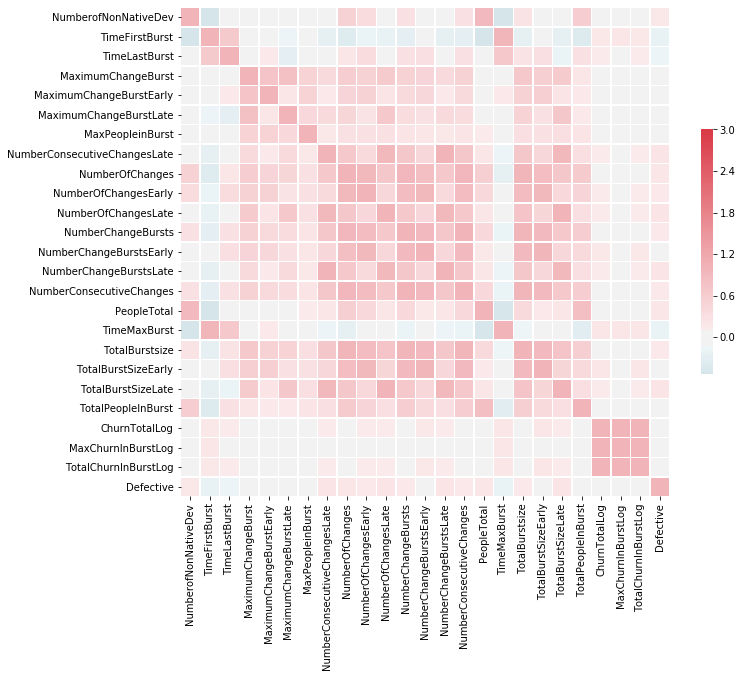

In [26]:
pearson = File_Risk.corr(method='pearson')
f, ax=plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(pearson,cmap=cmap, vmax=3, center=0,square=True, linewidths=.5,cbar_kws={"shrink": .5})
#plt.savefig('correlation.jpg')
# there silght corelation between NumberChangeBursts and NumberChangeBurstEarly, Here we have to check with the 
## customer about the feature details and based upon we can act on this.
# NumberOfChanges and NumberOfChangesEarly
# High corelation between ChurnTotalLog, MaxChurnInBurstLog and TotalChurnInBurstLog, So we can drop any of the two
## feature and consider one feature for the prediction

In [27]:
corr = File_Risk.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("File Risk Prediction")\
    .set_precision(2)\
    .set_table_styles(magnify())

,NumberofNonNativeDev,TimeFirstBurst,TimeLastBurst,MaximumChangeBurst,MaximumChangeBurstEarly,MaximumChangeBurstLate,MaxPeopleinBurst,NumberConsecutiveChangesLate,NumberOfChanges,NumberOfChangesEarly,NumberOfChangesLate,NumberChangeBursts,NumberChangeBurstsEarly,NumberChangeBurstsLate,NumberConsecutiveChanges,PeopleTotal,TimeMaxBurst,TotalBurstsize,TotalBurstSizeEarly,TotalBurstSizeLate,TotalPeopleInBurst,ChurnTotalLog,MaxChurnInBurstLog,TotalChurnInBurstLog,Defective
NumberofNonNativeDev,1,-0.53,0.026,-0.031,-0.062,-0.034,-0.013,0.094,0.53,0.37,0.061,0.3,0.0081,0.094,0.3,0.91,-0.53,0.25,-0.0052,0.053,0.6,-0.1,-0.11,-0.11,0.18
TimeFirstBurst,-0.53,1,0.65,-0.072,0.033,-0.16,-0.042,-0.24,-0.36,-0.17,-0.22,-0.26,-0.056,-0.24,-0.26,-0.53,0.98,-0.24,-0.045,-0.24,-0.39,0.18,0.19,0.18,-0.2
TimeLastBurst,0.026,0.65,1,0.11,0.15,-0.26,0.052,-0.1,0.19,0.36,0.024,0.27,0.34,-0.1,0.27,0.095,0.67,0.25,0.33,-0.18,0.3,0.13,0.11,0.13,-0.14
MaximumChangeBurst,-0.031,-0.072,0.11,1,0.73,0.81,0.49,0.4,0.61,0.53,0.62,0.53,0.48,0.4,0.53,0.096,0.091,0.66,0.58,0.63,0.21,0.085,0.043,0.085,0.085
MaximumChangeBurstEarly,-0.062,0.033,0.15,0.73,1,0.21,0.51,0.16,0.48,0.53,0.23,0.4,0.42,0.16,0.4,0.048,0.15,0.52,0.58,0.22,0.16,0.11,0.063,0.11,0.055
MaximumChangeBurstLate,-0.034,-0.16,-0.26,0.81,0.21,1,0.42,0.38,0.47,0.25,0.68,0.38,0.26,0.38,0.38,0.079,0.063,0.5,0.29,0.7,0.16,0.079,0.047,0.079,0.1
MaxPeopleinBurst,-0.013,-0.042,0.052,0.49,0.51,0.42,1,0.17,0.31,0.27,0.31,0.23,0.2,0.17,0.23,0.13,0.027,0.33,0.28,0.32,0.23,0.031,0.013,0.031,0.041
NumberConsecutiveChangesLate,0.094,-0.24,-0.1,0.4,0.16,0.38,0.17,1,0.67,0.4,0.92,0.69,0.44,1,0.69,0.21,-0.15,0.69,0.43,0.93,0.32,0.13,0.079,0.13,0.23
NumberOfChanges,0.53,-0.36,0.19,0.61,0.48,0.47,0.31,0.67,1,0.92,0.7,0.95,0.84,0.67,0.95,0.58,-0.25,0.96,0.85,0.7,0.63,0.052,-0.018,0.052,0.21
NumberOfChangesEarly,0.37,-0.17,0.36,0.53,0.53,0.25,0.27,0.4,0.92,1,0.42,0.88,0.92,0.4,0.88,0.42,-0.026,0.89,0.94,0.41,0.48,0.14,0.046,0.14,0.15


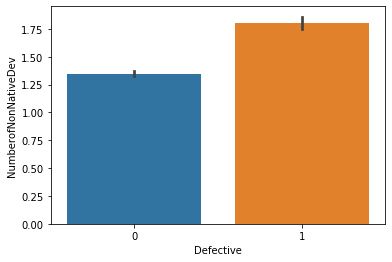

In [28]:
sns.barplot(y = File_Risk['NumberofNonNativeDev'], x = File_Risk['Defective'], data = File_Risk)
# barplot to check the number of yes and no with respect to Numberof NonNativeDev

In [29]:
File_Risk['NumberofNonNativeDev'].replace(np.nan , 0,inplace= True)
#replacing the 0 nan value with 0 as it less compare to 1 "484"

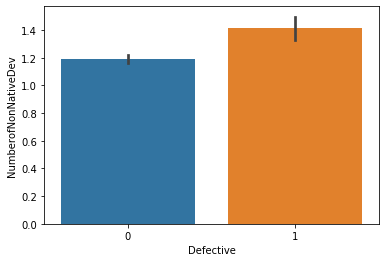

In [30]:
sns.barplot(y = File_Risk['NumberofNonNativeDev'], x = File_Risk['Defective'], data = File_Risk)

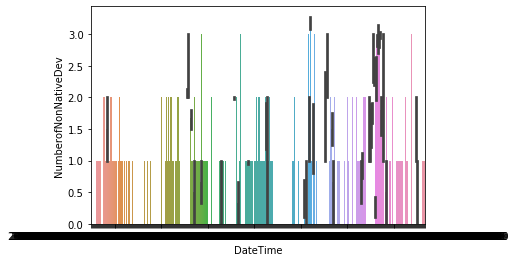

In [31]:
sns.barplot(y = File_Risk['NumberofNonNativeDev'], x = File_Risk['DateTime'], data = File_Risk)
# barplot of NumberofNonNativeDev with respect to DateTime as we have to analyzed it with DateTime

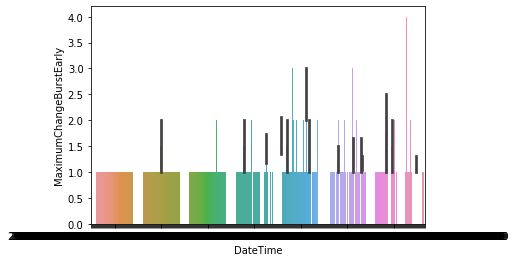

In [32]:
sns.barplot(x = File_Risk['DateTime'], y = File_Risk['MaximumChangeBurstEarly'], data = File_Risk)
# visualization of MaximumChangeBurstEarly and found that maximum number are 1

In [33]:
File_Risk['MaximumChangeBurstEarly'].replace(np.nan , 1,inplace= True)
# Replacing the nan value with 1 as its is maximum in number and total null value is 1181

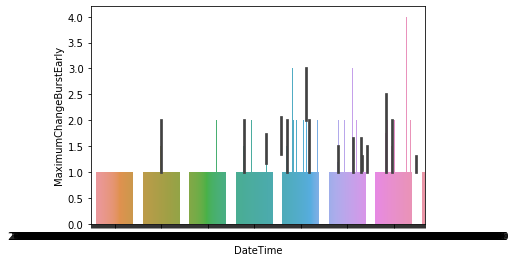

In [34]:
sns.barplot(x = File_Risk['DateTime'], y = File_Risk['MaximumChangeBurstEarly'], data = File_Risk)
# Post visualization of MaximumChangeBurst Early where nan value replace with 1

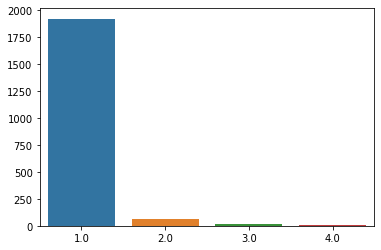

In [35]:
a = File_Risk['MaximumChangeBurstLate'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
# Visualization of MaximumChangeBurstLate and value of 1 is maximum as compare to other

In [36]:
File_Risk['MaximumChangeBurstLate'].replace(np.nan, 1, inplace = True)
# Replaceing the nan value with 1 as maximum nan value is 1818

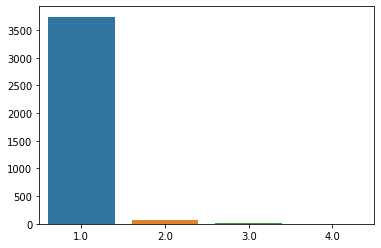

In [37]:
a = File_Risk['MaximumChangeBurstLate'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
# Post visualization of MaximumChangeBurstLate

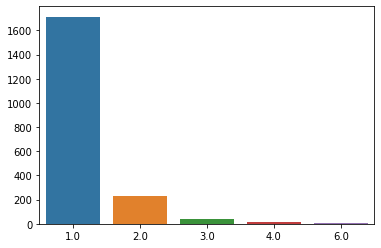

In [38]:
a = File_Risk['NumberConsecutiveChangesLate'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
#Visualization of NumberConsecutiveChangesLate

In [39]:
File_Risk['NumberConsecutiveChangesLate'].replace(np.nan, method = 'ffill', inplace = True)
#Replacing the nan value with farward filled value

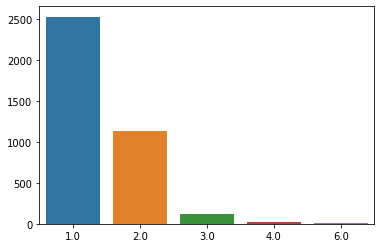

In [40]:
a = File_Risk['NumberConsecutiveChangesLate'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
# Post Visualization of NumberConsecutiveChangesLate

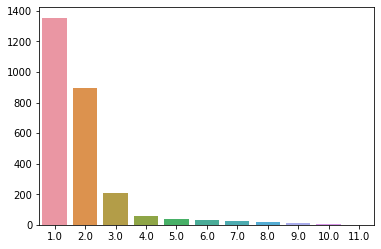

In [41]:
a = File_Risk['NumberOfChangesEarly'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
# Visulatization of NumberOfChangesEarly

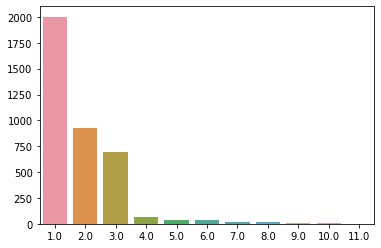

In [42]:
File_Risk['NumberOfChangesEarly'].replace(np.nan,method = 'ffill',inplace =True)

a = File_Risk['NumberOfChangesEarly'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
#Replace the nan value with farword filled value and post visualization

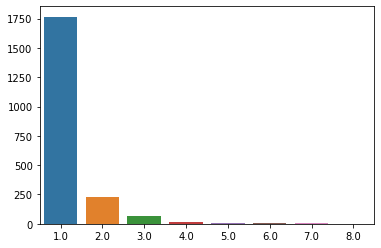

In [43]:
a = File_Risk['NumberOfChangesLate'].value_counts()
sns.barplot(x =a.index, y = a.values, data = File_Risk )
# Visualization of NumberOfChangeLate

In [44]:
File_Risk.fillna(method = 'ffill',inplace = True)
# After visualization of above feature replace all the nan value in File_Risk with forward filled value

In [45]:
File_Risk.isnull().sum() #Total sum of null value after forward filled

NumberofNonNativeDev            0
TimeFirstBurst                  0
TimeLastBurst                   0
MaximumChangeBurst              0
MaximumChangeBurstEarly         0
MaximumChangeBurstLate          0
MaxPeopleinBurst                0
NumberConsecutiveChangesLate    1
NumberOfChanges                 0
NumberOfChangesEarly            0
NumberOfChangesLate             1
NumberChangeBursts              0
NumberChangeBurstsEarly         0
NumberChangeBurstsLate          1
NumberConsecutiveChanges        0
PeopleTotal                     0
TimeMaxBurst                    0
TotalBurstsize                  0
TotalBurstSizeEarly             0
TotalBurstSizeLate              1
TotalPeopleInBurst              0
ChurnTotalLog                   0
MaxChurnInBurstLog              0
TotalChurnInBurstLog            0
DateTime                        0
Defective                       0
dtype: int64

In [46]:
File_Risk.dropna(axis = 0, inplace =True)
# droping the remaining nan value as they are very less in number and doesn't affect the data set

In [47]:
File_Risk.isnull().sum() # File_Risk data frame with 0 null value

NumberofNonNativeDev            0
TimeFirstBurst                  0
TimeLastBurst                   0
MaximumChangeBurst              0
MaximumChangeBurstEarly         0
MaximumChangeBurstLate          0
MaxPeopleinBurst                0
NumberConsecutiveChangesLate    0
NumberOfChanges                 0
NumberOfChangesEarly            0
NumberOfChangesLate             0
NumberChangeBursts              0
NumberChangeBurstsEarly         0
NumberChangeBurstsLate          0
NumberConsecutiveChanges        0
PeopleTotal                     0
TimeMaxBurst                    0
TotalBurstsize                  0
TotalBurstSizeEarly             0
TotalBurstSizeLate              0
TotalPeopleInBurst              0
ChurnTotalLog                   0
MaxChurnInBurstLog              0
TotalChurnInBurstLog            0
DateTime                        0
Defective                       0
dtype: int64

In [48]:
#File_Risk.reset_index()

In [49]:
File_Risk["DateTime"] = pd.to_datetime(File_Risk["DateTime"]).dt.strftime("%Y%m%d")
#Chnaging the DateTime in yyyymmdd format

In [50]:
def plot_clusters(File_Risk, algorithm, args, kwds):
    start_time = time.time()
    #labels = algorithm(*args, **kwds).fit_predict(File_Risk)
    labels =File_Risk['Defective']
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(File_Risk.T[0], File_Risk.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [51]:
#plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

In [52]:
y=File_Risk['Defective'] # setting the value of Y as defective 
X= File_Risk.drop(['Defective'],axis = 1) # setting the value of X after droping Defective "Remaining feature"

In [53]:
def plot_clusters(File_Risk, algorithm, args, kwds):
    start_time = time.time()
    #labels = algorithm(*args, **kwds).fit_predict(File_Risk)
    labels =y
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(File_Risk.T[DateTime], File_Risk.T[DateTime], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [54]:
#plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

In [55]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X)
# Standardized the data to transform the mean with 0 and standard devation to 1
# It is useful when we have negative value but in this data we don't have
# It arrange the data in normal distribuation

array([[-1.50052003e+00, -2.07174013e-01,  6.57888999e-01, ...,
         5.47229401e-01,  7.49171053e-01,  7.03361177e-01],
       [-1.50052003e+00, -5.26641308e-01,  5.81901243e-01, ...,
        -6.09251666e-01, -7.91719489e-02,  7.00811138e-01],
       [-1.50052003e+00, -5.26641308e-01,  5.81901243e-01, ...,
        -7.70741432e-01, -3.02227313e-01,  7.00173628e-01],
       ...,
       [-1.50052003e+00, -5.26641308e-01,  5.61637842e-01, ...,
         8.43273044e-01,  1.04486544e+00,  6.84660885e-01],
       [-1.50052003e+00, -5.26641308e-01, -7.70680816e-01, ...,
         1.03208990e-03,  1.69285204e-02, -1.35962111e+00],
       [-1.50052003e+00, -5.26641308e-01,  5.61637842e-01, ...,
        -1.68193845e-01,  2.21452588e-01,  6.84660885e-01]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)
# spliting the dataframe in training of 80% and testing of 20%

In [57]:
X_train.shape

(3053, 25)

In [58]:
y_train.shape

(3053,)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# applying Random forest classifier without hyperparamter

C:\Users\jasbsing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_pred = classifier.predict_proba(X_test)
# Observed the probability of each row

In [61]:
print(y_pred)

[[1.  0. ]
 [0.3 0.7]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


In [62]:
y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,make_scorer
accuracy_score(y_test,y_pred) # random forest prediction with any specific hyperparameter

0.9829842931937173

In [64]:
acc_scorer = make_scorer(accuracy_score)

In [65]:
from sklearn.model_selection import GridSearchCV #for random forest
param = {'max_depth':[5,6,7,8,9,10],
         'criterion':['gini','entropy'],
         'max_features':[5,10,15,20],
         'n_estimators':[10,20,30,40,50,70,100]
        }
grid = GridSearchCV(classifier,param, cv= 5, scoring=acc_scorer)
#Using Hyper paramter to find outcome with the given input and iterative approaches. It reduce the manual
# computation of permutation 

In [66]:
grid_classifier = grid.fit(X_train,y_train)

In [67]:
clf = grid_classifier.best_estimator_

In [68]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions)) # random forest best prediction via gini and max depth =10

0.9895287958115183


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Precision is a ratio of the number of true positives divided by the sum of 
# the true positives and false positives. It describes how good a model is at predicting the positive class (1). 
# Precision is referred to as the positive predictive value
# Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and
# the false negatives. Recall is the same as sensitivity
# Reviewing both precision and recall is useful in cases where there is an imbalance in the observations 
# between the two classes
# that calculates the harmonic mean of the precision and recall 
# harmonic mean because the precision and recall are ratios

[[682   2]
 [ 11  69]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       684
           1       0.97      0.86      0.91        80

    accuracy                           0.98       764
   macro avg       0.98      0.93      0.95       764
weighted avg       0.98      0.98      0.98       764



In [71]:
from sklearn.metrics import roc_curve # ROC tells us how good the model is for distinguishing 
from sklearn.metrics import roc_auc_score #the given classes, in terms of the predicted probability
from matplotlib import pyplot
rf_auc = roc_auc_score(y_test, y_pred)
print('Random_Forest: ROC AUC=%.3f' % (rf_auc))
#the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities
#for the 1 class. It returns the AUC score between 0.0 and 1.0
#summarizes the integral or an approximation of the area under the precision-recall curve.
# F1 summarizes model skill for a specific probability threshold (e.g. 0.5),
# whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

Random_Forest: ROC AUC=0.930


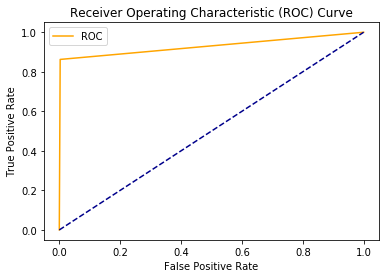

<Figure size 432x288 with 0 Axes>

In [72]:
def plot_roc_curve(fpr, tpr): 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
plt.savefig('RF_ROC_AUC.jpg')
# The function takes both the true outcomes (0,1) from the test set and the predicted,
# probabilities for the 1 class. The function returns the false positive rates for each threshold,
# true positive rates for each threshold and thresholds.

In [73]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifer
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
y_pred = classifier.predict_proba(X_test)

In [75]:
print(y_pred)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [76]:
y_pred = classifier.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score,make_scorer
accuracy_score(y_test,y_pred) # decision tree prediction with out any given hyperparameter

0.9856020942408377

In [78]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)
clf =clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred)) # decision tree prediction by using entropy and max depth =6

Accuracy: 0.9633507853403142


In [79]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=6)
clf =clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred)) # decision tree prediction by using gini and max depth =6

Accuracy: 0.9633507853403142


In [80]:
from sklearn.model_selection import GridSearchCV # for decision tree
param = {'max_depth':[5,6,7,8,9,10],
         'criterion':['gini','entropy'],
         'max_features':[5,10,15,20],
        }
grid = GridSearchCV(classifier,param, cv= 5, scoring=acc_scorer)

In [81]:
grid_classifier = grid.fit(X_train,y_train)

In [82]:
clf = grid_classifier.best_estimator_

In [83]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
predictions = clf.predict(X_test) # decision tree best prediction 
print(accuracy_score(y_test, predictions)) # best prediction in decision tree by using entropy and max depth=10

0.9646596858638743


In [85]:
from sklearn.metrics import roc_curve # ROC tells us how good the model is for distinguishing 
from sklearn.metrics import roc_auc_score #the given classes, in terms of the predicted probability
from matplotlib import pyplot
rf_auc = roc_auc_score(y_test, y_pred)
print('Decision_Tree: ROC AUC=%.3f' % (rf_auc))

Decision_Tree: ROC AUC=0.842


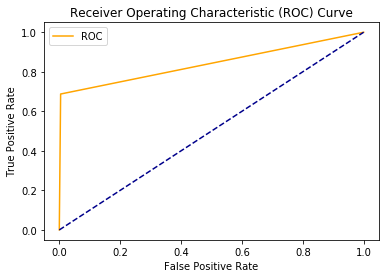

In [86]:
def plot_roc_curve(fpr, tpr): 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
from sklearn.model_selection import GridSearchCV # for KNN
param = {'leaf_size':[10,20,30,40],
         'n_jobs':[10,12,20,30],
         'n_neighbors':[2,3,4,5,6]
        }
grid = GridSearchCV(classifier,param, cv= 5, scoring=acc_scorer)

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score,make_scorer
accuracy_score(y_test,y_pred) # KNN accuracy

0.9803664921465969

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.model_selection import GridSearchCV  # for GBM
param = {'max_depth':[5,6,7,8,9,10],
         'learning_rate':[0.1,0.001,0.02],
         'max_features':[5,10,15,20],
         'n_estimators':[10,20,30,40,50,80,100],
        }
grid = GridSearchCV(classifier,param, cv= 5, scoring=acc_scorer)

In [94]:
grid_classifier = grid.fit(X_train,y_train)

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score,make_scorer
accuracy_score(y_test,y_pred) #GBM prediction

0.9803664921465969

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[682   2]
 [ 13  67]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       684
           1       0.97      0.84      0.90        80

    accuracy                           0.98       764
   macro avg       0.98      0.92      0.94       764
weighted avg       0.98      0.98      0.98       764



In [98]:
#File_Risk["DateTime"] = pd.to_datetime(File_Risk["DateTime"]).int(dt.strftime("%Y%m%d"))

In [99]:
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
# as a different cluster is more similar
# silhouette score returns the mean sample result 93 is very good score it means almost each data belong to 
# proper cluster

0.938328636251435

In [100]:
conda install -c districtdatalabs yellowbrick #installing yellowbrick


Note: you may need to restart the kernel to use updated packages.



CondaValueError: invalid package specification: #installing



C:\Users\jasbsing\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\jasbsing\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\jasbsing\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


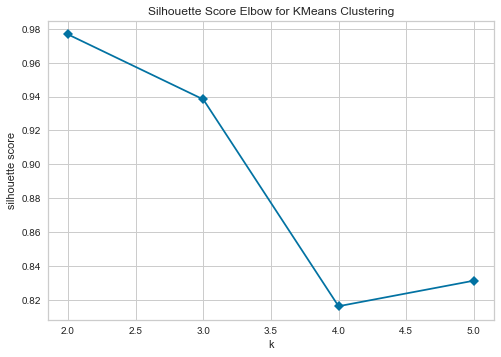

In [101]:
from sklearn.metrics import silhouette_score
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 
    # best silhouette score is with k value 3 so we decided to go with K=3

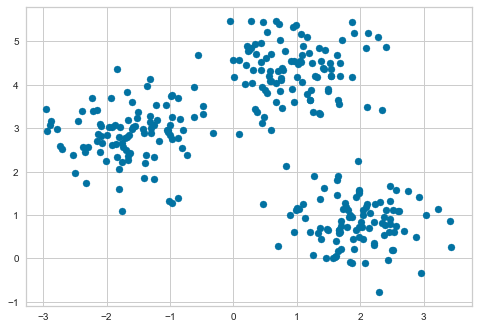

In [102]:
from sklearn.datasets.samples_generator import make_blobs #to plot 2D dataset to confirm its a unsupervised algorithum
from sklearn.cluster import KMeans
X,y= make_blobs(n_samples=300,centers=3,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1]) #plotting the cluster center and the data points in 2D plane

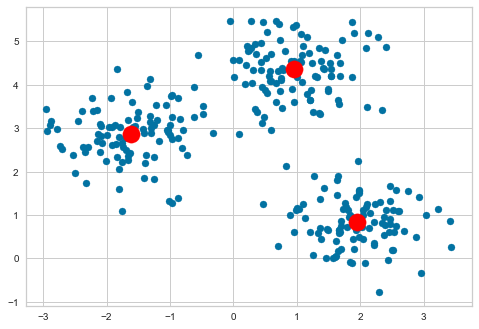

In [103]:
kmeans =KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=0)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')

plt.show()
#The goal of kmeans is to group data points into distinct non-overlapping subgroups
#Kmeans gives more weight to the bigger clusters.
#Kmeans algorithm is good in capturing structure of the data if clusters have a spherical-like shape


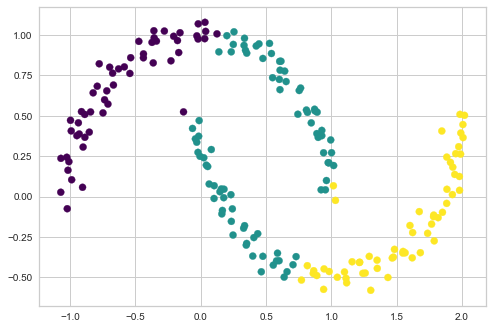

In [104]:
from sklearn.datasets import make_moons # we can analyzed noise and boundaries with make moon function
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
#The make_moons() function is for binary classification and will generate a swirl pattern, or two moons.
#We can control how noisy the moon shapes are and the number of samples to generate.
#This test problem is suitable for algorithms that are capable of learning nonlinear class boundaries

In [105]:
plt.savefig('figure.pdf')

<Figure size 576x396 with 0 Axes>

In [106]:
from numpy.linalg import norm

class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

NameError: name 'df' is not defined

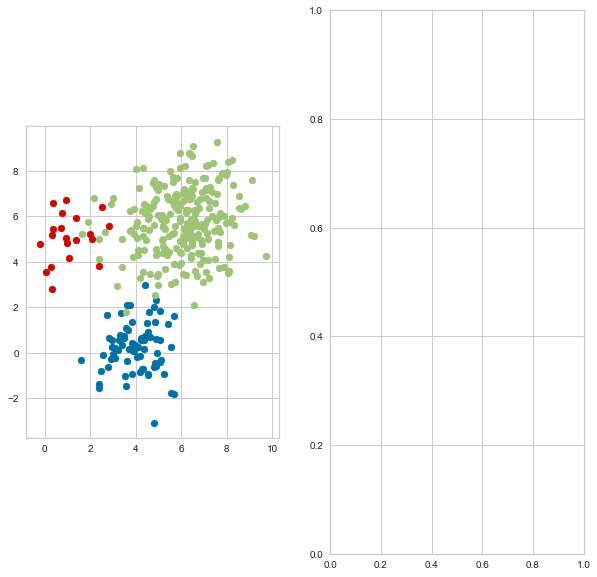

In [107]:
# Create data from three different multivariate distributions
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
File_Risk = np.concatenate([X_1, X_2, X_3])

# Run kmeans
km = KMeans(n_clusters=3)
km.fit(File_Risk)
labels = km.predict(File_Risk)
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()